In [1]:
import pandas as pd
"""
header = 0 은 파일의 첫 번째 줄에 열 이름이 있음을 나타내며 
delimiter = \t 는 필드가 탭으로 구분되는 것을 의미한다.
quoting = 3은 쌍따옴표를 무시하도록 한다.
"""
# QUOTE_MINIMAL (0), QUOTE_ALL (1), 
# QUOTE_NONNUMERIC (2) or QUOTE_NONE (3).

# 레이블인 sentiment 가 있는 학습 데이터
train = pd.read_csv('data/labeledTrainData.tsv', 
                    header=0, delimiter='\t', quoting=3)
# 레이블이 없는 테스트 데이터
test = pd.read_csv('data/testData.tsv', 
                   header=0, delimiter='\t', quoting=3)
print(train.shape)
print(test.shape)

(25000, 3)
(25000, 2)


In [2]:
train['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.0+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
id        25000 non-null object
review    25000 non-null object
dtypes: object(2)
memory usage: 390.7+ KB


In [5]:
from KaggleWord2VecUtility import KaggleWord2VecUtility

In [6]:
%time train['review_clean'] = KaggleWord2VecUtility.apply_by_multiprocessing(\
    train['review'], KaggleWord2VecUtility.review_to_join_words, workers=4)

CPU times: user 108 ms, sys: 112 ms, total: 220 ms
Wall time: 51.4 s


In [7]:
%time test['review_clean'] = KaggleWord2VecUtility.apply_by_multiprocessing(\
    test['review'], KaggleWord2VecUtility.review_to_join_words, workers=4)

CPU times: user 115 ms, sys: 150 ms, total: 265 ms
Wall time: 50.3 s


In [8]:
train['review_clean'][:10]

0    with all this stuff go down at the moment with...
1    the classic war of the world by timothi hine i...
2    the film start with a manag nichola bell give ...
3    it must be assum that those who prais this fil...
4    superbl trashi and wondrous unpretenti s explo...
5    i dont know whi peopl think this is such a bad...
6    this movi could have been veri good but come u...
7    i watch this video at a friend s hous i m glad...
8    a friend of mine bought this film for and even...
9    this movi is full of refer like mad max ii the...
Name: review_clean, dtype: object

In [9]:
test['review_clean'][:10]

0    natur in a film who s main theme are of mortal...
1    this movi is a disast within a disast film it ...
2    all in all this is a movi for kid we saw it to...
3    afraid of the dark left me with the impress th...
4    a veri accur depict of small time mob life fil...
5    as valuabl as king tut s tomb ok mayb not that...
6    this has to be one of the biggest misfir ever ...
7    this is one of those movi i watch and wonder w...
8    the worst movi i ve seen in year and i ve seen...
9    five medic student kevin bacon david labraccio...
Name: review_clean, dtype: object

In [10]:
X_train = train['review_clean']
X_test = test['review_clean']

## TF-IDF
TF(단어 빈도, term frequency)는 특정한 단어가 문서 내에 얼마나 자주 등장하는지를 나타내는 값으로, 이 값이 높을수록 문서에서 중요하다고 생각할 수 있다. 하지만 단어 자체가 문서군 내에서 자주 사용되는 경우, 이것은 그 단어가 흔하게 등장한다는 것을 의미한다. 이것을 DF(문서 빈도, document frequency)라고 하며, 이 값의 역수를 IDF(역문서 빈도, inverse document frequency)라고 한다. TF-IDF는 TF와 IDF를 곱한 값이다.

IDF 값은 문서군의 성격에 따라 결정된다. 예를 들어 '원자'라는 낱말은 일반적인 문서들 사이에서는 잘 나오지 않기 때문에 IDF 값이 높아지고 문서의 핵심어가 될 수 있지만, 원자에 대한 문서를 모아놓은 문서군의 경우 이 낱말은 상투어가 되어 각 문서들을 세분화하여 구분할 수 있는 다른 낱말들이 높은 가중치를 얻게 된다.

역문서 빈도(IDF)는 한 단어가 문서 집합 전체에서 얼마나 공통적으로 나타나는지를 나타내는 값이다. 전체 문서의 수를 해당 단어를 포함한 문서의 수로 나눈 뒤 로그를 취하여 얻을 수 있다.

* 출처 : [TF-IDF - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/TF-IDF)

\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \times (\log\big(\frac{N + 1}{N_w + 1}\big) + 1)
\end{equation*}

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from nltk.corpus import words

vectorizer = CountVectorizer(analyzer = 'word', 
                             lowercase = True,
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = 'english',
                             min_df = 2, # 토큰이 나타날 최소 문서 개수
                             ngram_range=(1, 3),
                             vocabulary = set(words.words()),
                             max_features = None
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None,
        vocabulary={'cavatina', 'perseveringly', 'Puya', 'destination', 'geoisotherm', 'said', 'alphitomancy', 'sublinguae', 'Lepospondyli', 'maxillofacial', 'unloyalty', 'bufflehead', 'aggregator', 'enraged', 'profectitious', 'crotin', 'tonous', 'dyslogistic', 'scruplesome', 'Trichuris', 'disfigurative', '...n', 'unbenefiting', 'parthenocarpelly', 'unpatronized', 'cementoblast', 'leptid', 'conjugationally'})

In [12]:
pipeline = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer(smooth_idf = False)),
])  
pipeline

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        ...('tfidf', TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True))])

In [13]:
%time X_train_tfidf_vector = pipeline.fit_transform(X_train)

CPU times: user 9.45 s, sys: 85.2 ms, total: 9.53 s
Wall time: 9.56 s


/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1067: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(float(n_samples) / df) + 1.0


In [14]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

235892


['A',
 'Aani',
 'Aaron',
 'Aaronic',
 'Aaronical',
 'Aaronite',
 'Aaronitic',
 'Aaru',
 'Ab',
 'Ababdeh']

In [15]:
%time X_test_tfidf_vector = pipeline.fit_transform(X_test)

CPU times: user 9.18 s, sys: 70.7 ms, total: 9.25 s
Wall time: 9.28 s


/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1067: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(float(n_samples) / df) + 1.0


In [16]:
train['review_clean'][:3]

0    with all this stuff go down at the moment with...
1    the classic war of the world by timothi hine i...
2    the film start with a manag nichola bell give ...
Name: review_clean, dtype: object

In [17]:
import numpy as np
dist = np.sum(X_train_tfidf_vector, axis=0)
    
for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns=vocab)

[[0. 0. 0. ... 0. 0. 0.]] A


,A,Aani,Aaron,Aaronic,Aaronical,Aaronite,Aaronitic,Aaru,Ab,Ababdeh,...,zymotechnical,zymotechnics,zymotechny,zymotic,zymotically,zymotize,zymotoxic,zymurgy,zythem,zythum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용
forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

In [19]:
%time forest = forest.fit(X_train_tfidf_vector, train['sentiment'])

CPU times: user 4min 48s, sys: 1.06 s, total: 4min 49s
Wall time: 1min 17s


In [20]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
    forest, X_train_tfidf_vector, \
    train['sentiment'], cv=10, scoring='roc_auc', n_jobs=-1))

CPU times: user 920 ms, sys: 193 ms, total: 1.11 s
Wall time: 12min 33s


In [21]:
%time result = forest.predict(X_test_tfidf_vector)

CPU times: user 3.67 s, sys: 87.1 ms, total: 3.75 s
Wall time: 1.09 s


In [22]:
result[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [23]:
output = pd.DataFrame(data={'id':test['id'], 'sentiment':result})
output.head()

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",0
3,"""7186_2""",1
4,"""12128_7""",1


In [24]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment

-382


1    12691
0    12309
Name: sentiment, dtype: int64

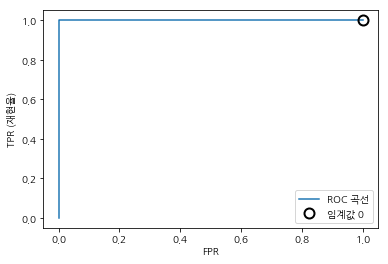

In [29]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

y_proba = forest.predict_proba(X_train_tfidf_vector)[:,1]
fpr, tpr, thresholds = roc_curve(
    train['sentiment'], y_proba)

plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
# 0 근처의 임계값을 찾는다.
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [26]:
output.to_csv('data/tutorial_4_tfidf_{0:.5f}.csv'.format(score), index=False, quoting=3)

In [27]:
'{:,.5f}'.format(score)

'0.90701'

In [28]:
# local 0.92679 kaggle 0.82332
# stop_words = 'english' vocabulary = set(words.words()), smooth_idf = False
540/578

0.9342560553633218